In [144]:
import pandas as pd

# Load the data
player_data = pd.read_csv('./data/players.csv')
salary_data = pd.read_csv('./data/salaries_1985to2018.csv')

In [145]:
player_data.head()

,index,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,...,draft_pick,draft_round,draft_team,draft_year,height,highSchool,name,position,shoots,weight
0,0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,...,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb
1,1,abdulza01,"April 7, 1946","Brooklyn, New York",1.2,42.8,NaN,72.8,505,15.1,...,5th overall,1st round,Cincinnati Royals,1968,6-9,"John Jay in Brooklyn, New York",Zaid Abdul-Aziz,Power Forward and Center,Right,235lb
2,2,abdulka01,"April 16, 1947","New York, New York",3.6,55.9,5.6,72.1,1560,24.6,...,1st overall,1st round,Milwaukee Bucks,1969,7-2,"Power Memorial in New York, New York",Kareem Abdul-Jabbar,Center,Right,225lb
3,3,abdulma02,"March 9, 1969","Gulfport, Mississippi",3.5,44.2,35.4,90.5,586,15.4,...,3rd overall,1st round,Denver Nuggets,1990,6-1,"Gulfport in Gulfport, Mississippi",Mahmoud Abdul-Rauf,Point Guard,Right,162lb
4,4,abdulta01,"November 3, 1974","Maisons Alfort, France",1.1,41.7,23.7,70.3,236,11.4,...,11th overall,1st round,Sacramento Kings,1997,6-6,"Lycee Aristide Briand in Evreux, France",Tariq Abdul-Wahad,Shooting Guard,Right,223lb


In [146]:
player_data.columns

Index(['index', '_id', 'birthDate', 'birthPlace', 'career_AST', 'career_FG%',
       'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS',
       'career_TRB', 'career_WS', 'career_eFG%', 'college', 'draft_pick',
       'draft_round', 'draft_team', 'draft_year', 'height', 'highSchool',
       'name', 'position', 'shoots', 'weight'],
      dtype='object')

In [147]:
salary_data.head()

,index,league,player_id,salary,season,season_end,season_start,team
0,0,NBA,abdelal01,395000,1990-91,1991,1990,Portland Trail Blazers
1,1,NBA,abdelal01,494000,1991-92,1992,1991,Portland Trail Blazers
2,2,NBA,abdelal01,500000,1992-93,1993,1992,Boston Celtics
3,3,NBA,abdelal01,805000,1993-94,1994,1993,Boston Celtics
4,4,NBA,abdelal01,650000,1994-95,1995,1994,Sacramento Kings


In [148]:
salary_data.columns

Index(['index', 'league', 'player_id', 'salary', 'season', 'season_end',
       'season_start', 'team'],
      dtype='object')

In [149]:
# Combine the data based on player_id and _id
combined_data = pd.merge(player_data, salary_data, left_on='_id', right_on='player_id')

combined_data.head()

,index_x,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,...,shoots,weight,index_y,league,player_id,salary,season,season_end,season_start,team
0,0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,...,Right,240lb,0,NBA,abdelal01,395000,1990-91,1991,1990,Portland Trail Blazers
1,0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,...,Right,240lb,1,NBA,abdelal01,494000,1991-92,1992,1991,Portland Trail Blazers
2,0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,...,Right,240lb,2,NBA,abdelal01,500000,1992-93,1993,1992,Boston Celtics
3,0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,...,Right,240lb,3,NBA,abdelal01,805000,1993-94,1994,1993,Boston Celtics
4,0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,...,Right,240lb,4,NBA,abdelal01,650000,1994-95,1995,1994,Sacramento Kings


In [ ]:
# Get highest season end
highest_season_end = salary_data['season_end'].max()
highest_season_end

In [ ]:
# Filter the data to only season_end > 2010
recent_data = combined_data[combined_data['season_end'] > 2010]

In [ ]:
# Show the average salary for each position in graph
import matplotlib.pyplot as plt

recent_data.groupby('position')['salary'].mean().plot(kind='bar')
plt.show()

In [ ]:
# Show the average salary for each position, sorted
recent_data.groupby('position')['salary'].mean().sort_values().plot(kind='bar')

In [ ]:
# Show the average salary for each position list
print(recent_data.groupby('position')['salary'].mean().sort_values())

In [ ]:
career_earnings = salary_data[["player_id", "salary"]].groupby("player_id").sum()
career_earnings.head()

In [ ]:
career_player_data = player_data.join(career_earnings, on="_id")
career_player_data["draft_pick"].head()

In [ ]:
career_player_data["draft_pick_num"] = career_player_data["draft_pick"].replace(r"\D+", "", regex=True)
career_player_data["draft_pick_num"] = pd.to_numeric(career_player_data["draft_pick_num"])
career_player_data["draft_pick_num"].head()

In [ ]:
# Create column if player position was "Power Forward and Small Forward and Shooting Guard"
career_player_data["is_combo_position"] = career_player_data["position"] == ("Power Forward and Small Forward and Shooting Guard")
career_player_data["is_combo_position"].head()

In [ ]:
import seaborn as sns
import numpy as np

sns.set_theme(style="ticks")
f, axes = plt.subplots(figsize=(7, 7))
# Color by if they are "Power Forward and Small Forward and Shooting Guard"
sns.scatterplot(x = career_player_data[career_player_data["draft_pick_num"] < 60]["draft_pick_num"], y = np.log(career_player_data["salary"]), hue = career_player_data[career_player_data["draft_pick_num"] < 60]["is_combo_position"])

plt.show()

In [ ]:
# Make a column for each position they played
career_player_data["is_power_forward"] = career_player_data["position"].str.contains("Power Forward")
career_player_data["is_small_forward"] = career_player_data["position"].str.contains("Small Forward")
career_player_data["is_shooting_guard"] = career_player_data["position"].str.contains("Shooting Guard")
career_player_data["is_center"] = career_player_data["position"].str.contains("Center")
career_player_data["is_point_guard"] = career_player_data["position"].str.contains("Point Guard")


In [ ]:
career_player_data[["name", "position", "is_power_forward", "is_small_forward", "is_shooting_guard", "is_center", "is_point_guard"]].head()

In [ ]:
# find players who are power forward, small forward, and shooting guards

career_player_data[(career_player_data["is_power_forward"] & career_player_data["is_small_forward"] & career_player_data["is_shooting_guard"])]

In [ ]:
sns.set_theme(style="ticks")
f, axes = plt.subplots(figsize=(7, 7))

sns.scatterplot(x = career_player_data[career_player_data["draft_pick_num"] < 60]["draft_pick_num"], y = np.log(career_player_data["salary"]), hue = career_player_data[career_player_data["draft_pick_num"] < 60]["is_small_forward"])
plt.show()

In [ ]:
sns.set_theme(style="ticks")
f, axes = plt.subplots(figsize=(7, 7))

sns.scatterplot(x = career_player_data[career_player_data["draft_pick_num"] < 60]["draft_pick_num"], y = np.log(career_player_data["salary"]), hue = career_player_data[career_player_data["draft_pick_num"] < 60]["is_shooting_guard"])
plt.show()

In [ ]:
sns.set_theme(style="ticks")
f, axes = plt.subplots(figsize=(7, 7))

sns.scatterplot(x = career_player_data[career_player_data["draft_pick_num"] < 60]["draft_pick_num"], y = np.log(career_player_data["salary"]), hue = career_player_data[career_player_data["draft_pick_num"] < 60]["is_center"])
plt.show()

In [ ]:
sns.set_theme(style="ticks")
f, axes = plt.subplots(figsize=(7, 7))

sns.scatterplot(x = career_player_data[career_player_data["draft_pick_num"] < 60]["draft_pick_num"], y = np.log(career_player_data["salary"]), hue = career_player_data[career_player_data["draft_pick_num"] < 60]["is_point_guard"])
plt.show()

In [ ]:
# Show average salary for each position by binary position
career_player_data.groupby("is_power_forward")["salary"].mean()
career_player_data.groupby("is_small_forward")["salary"].mean()
career_player_data.groupby("is_shooting_guard")["salary"].mean()
career_player_data.groupby("is_center")["salary"].mean()
career_player_data.groupby("is_point_guard")["salary"].mean()

## Regression Model

In [150]:
# Make a column for each position they played
combined_data["is_power_forward"] = combined_data["position"].str.contains("Power Forward")
combined_data["is_small_forward"] = combined_data["position"].str.contains("Small Forward")
combined_data["is_shooting_guard"] = combined_data["position"].str.contains("Shooting Guard")
combined_data["is_center"] = combined_data["position"].str.contains("Center")
combined_data["is_point_guard"] = combined_data["position"].str.contains("Point Guard")

In [151]:
combined_data.columns

Index(['index_x', '_id', 'birthDate', 'birthPlace', 'career_AST', 'career_FG%',
       'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS',
       'career_TRB', 'career_WS', 'career_eFG%', 'college', 'draft_pick',
       'draft_round', 'draft_team', 'draft_year', 'height', 'highSchool',
       'name', 'position', 'shoots', 'weight', 'index_y', 'league',
       'player_id', 'salary', 'season', 'season_end', 'season_start', 'team',
       'is_power_forward', 'is_small_forward', 'is_shooting_guard',
       'is_center', 'is_point_guard'],
      dtype='object')

In [152]:
# Create dummy variables for team
team_dummies = pd.get_dummies(combined_data["team"])

# Combine the data
combined_data = pd.concat([combined_data, team_dummies], axis=1)
combined_data.head()

,index_x,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,...,Phoenix Suns,Portland Trail Blazers,Sacramento Kings,San Antonio Spurs,Seattle SuperSonics,Toronto Raptors,Utah Jazz,Vancouver Grizzlies,Washington Bullets,Washington Wizards
0,0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,...,False,True,False,False,False,False,False,False,False,False
1,0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,...,False,True,False,False,False,False,False,False,False,False
2,0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,...,False,False,False,False,False,False,False,False,False,False
3,0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,...,False,False,False,False,False,False,False,False,False,False
4,0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,...,False,False,True,False,False,False,False,False,False,False


In [153]:
# SHow types of columns

player_data.dtypes

index            int64
_id             object
birthDate       object
birthPlace      object
career_AST     float64
career_FG%      object
career_FG3%     object
career_FT%      object
career_G         int64
career_PER      object
career_PTS     float64
career_TRB      object
career_WS       object
career_eFG%     object
college         object
draft_pick      object
draft_round     object
draft_team      object
draft_year      object
height          object
highSchool      object
name            object
position        object
shoots          object
weight          object
dtype: object

In [154]:
# Convert all columns to numeric

combined_data = combined_data.apply(pd.to_numeric, errors='coerce')


In [155]:
combined_data.head()

,index_x,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,...,Phoenix Suns,Portland Trail Blazers,Sacramento Kings,San Antonio Spurs,Seattle SuperSonics,Toronto Raptors,Utah Jazz,Vancouver Grizzlies,Washington Bullets,Washington Wizards
0,0,NaN,NaN,NaN,0.3,50.2,0.0,70.1,256,13.0,...,False,True,False,False,False,False,False,False,False,False
1,0,NaN,NaN,NaN,0.3,50.2,0.0,70.1,256,13.0,...,False,True,False,False,False,False,False,False,False,False
2,0,NaN,NaN,NaN,0.3,50.2,0.0,70.1,256,13.0,...,False,False,False,False,False,False,False,False,False,False
3,0,NaN,NaN,NaN,0.3,50.2,0.0,70.1,256,13.0,...,False,False,False,False,False,False,False,False,False,False
4,0,NaN,NaN,NaN,0.3,50.2,0.0,70.1,256,13.0,...,False,False,True,False,False,False,False,False,False,False


In [156]:
pd.options.display.max_rows = 4000

In [157]:
# Show columns with NaN values

combined_data.isna().sum()

index_x                                  0
_id                                  14163
birthDate                            14163
birthPlace                           14163
career_AST                               0
career_FG%                              12
career_FG3%                            501
career_FT%                              89
career_G                                 0
career_PER                               3
career_PTS                               0
career_TRB                               0
career_WS                                0
career_eFG%                             12
college                              14163
draft_pick                           14163
draft_round                          14163
draft_team                           14163
draft_year                            1902
height                               14163
highSchool                           14163
name                                 14163
position                             14163
shoots     

In [163]:
# Create df with only ['season_end', 'team', 'is_power_forward', 'is_small_forward',
    #    'is_shooting_guard', 'is_center', 'is_point_guard', 'career_AST', 'career_FG%',
    #    'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS',
    #    'career_TRB', 'career_WS', 'career_eFG%',] and team_dummies

refined_data = combined_data[['salary', 'season_end', 'is_power_forward', 'is_small_forward',
         'is_shooting_guard', 'is_center', 'is_point_guard', 'career_AST', 'career_FG%',
         'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS',
         'career_TRB', 'career_WS', 'career_eFG%'] + list(team_dummies.columns)]

In [164]:
# Drop NaN values

refined_data = refined_data.dropna()

refined_data.shape

(13626, 55)

In [175]:
refined_data.head()

,salary,season_end,is_power_forward,is_small_forward,is_shooting_guard,is_center,is_point_guard,career_AST,career_FG%,career_FG3%,...,Phoenix Suns,Portland Trail Blazers,Sacramento Kings,San Antonio Spurs,Seattle SuperSonics,Toronto Raptors,Utah Jazz,Vancouver Grizzlies,Washington Bullets,Washington Wizards
0,395000,1991,True,False,False,False,False,0.3,50.2,0.0,...,False,True,False,False,False,False,False,False,False,False
1,494000,1992,True,False,False,False,False,0.3,50.2,0.0,...,False,True,False,False,False,False,False,False,False,False
2,500000,1993,True,False,False,False,False,0.3,50.2,0.0,...,False,False,False,False,False,False,False,False,False,False
3,805000,1994,True,False,False,False,False,0.3,50.2,0.0,...,False,False,False,False,False,False,False,False,False,False
4,650000,1995,True,False,False,False,False,0.3,50.2,0.0,...,False,False,True,False,False,False,False,False,False,False


In [167]:
# Create regression model using ['season_end', 'team', 'is_power_forward', 'is_small_forward',
    #    'is_shooting_guard', 'is_center', 'is_point_guard', 'career_AST', 'career_FG%',
    #    'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS',
    #    'career_TRB', 'career_WS', 'career_eFG%',] and team_dummies

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = refined_data[['season_end', 'is_power_forward', 'is_small_forward',
         'is_shooting_guard', 'is_center', 'is_point_guard', 'career_AST', 'career_FG%',
         'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS',
         'career_TRB', 'career_WS', 'career_eFG%',] + list(team_dummies.columns)]
y = refined_data['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.44441543297545494

In [168]:

# Show the coefficients
coefficients = pd.DataFrame({'variable': X.columns, 'coefficient': model.coef_})
coefficients

,variable,coefficient
0,season_end,1.980995e+05
1,is_power_forward,4.021221e+04
2,is_small_forward,1.921177e+05
3,is_shooting_guard,-4.640608e+03
4,is_center,9.516740e+05
5,is_point_guard,-2.812656e+05
6,career_AST,1.715728e+05
7,career_FG%,2.038317e+04
8,career_FG3%,5.131137e+03
9,career_FT%,-1.582867e+04


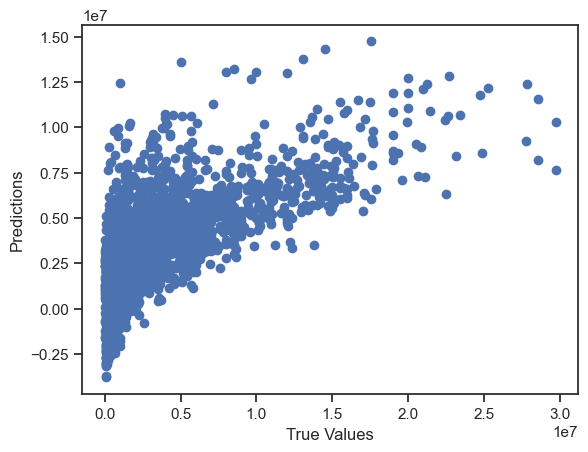

In [169]:
# Plot the points and the model

y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [170]:
# SHow unique season_end

refined_data['season_end'].unique()

array([1991, 1992, 1993, 1994, 1995, 1985, 1986, 1988, 1989, 1996, 1997,
       1998, 2001, 1999, 2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2010, 2017, 2018, 2009, 2013, 2014, 2015, 2016, 2011, 2012, 1987,
       1990])

In [174]:
modern_data = refined_data[refined_data['season_end'] > 2000]

X = modern_data[['season_end', 'is_power_forward', 'is_small_forward', 'is_shooting_guard', 'is_center', 'is_point_guard'] + list(team_dummies.columns)]
y = modern_data['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.02599284849986172